In [263]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [264]:
healthdf = pd.read_csv(r"C:\Users\oriha\Desktop\Serious Sql Excercises\csv\health_user_logs.csv")

In [265]:
healthdf.info() # repeating performance tuning done in the last notebook

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43891 entries, 0 to 43890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             43891 non-null  object 
 1   log_date       43891 non-null  object 
 2   measure        43891 non-null  object 
 3   measure_value  43891 non-null  float64
 4   systolic       17868 non-null  float64
 5   diastolic      17868 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.0+ MB


In [266]:
healthdf["measure"] = healthdf["measure"].astype("category")

In [267]:
healthdf.info() # notice memory usage is down 300 kb, 15%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43891 entries, 0 to 43890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             43891 non-null  object  
 1   log_date       43891 non-null  object  
 2   measure        43891 non-null  category
 3   measure_value  43891 non-null  float64 
 4   systolic       17868 non-null  float64 
 5   diastolic      17868 non-null  float64 
dtypes: category(1), float64(3), object(2)
memory usage: 1.7+ MB


In [268]:
healthdf["systolic"].fillna(0, inplace = True) # getting rid of nan values
healthdf["diastolic"].fillna(0, inplace = True)

In [269]:
healthdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43891 entries, 0 to 43890
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             43891 non-null  object  
 1   log_date       43891 non-null  object  
 2   measure        43891 non-null  category
 3   measure_value  43891 non-null  float64 
 4   systolic       43891 non-null  float64 
 5   diastolic      43891 non-null  float64 
dtypes: category(1), float64(3), object(2)
memory usage: 1.7+ MB


In [270]:
healthdf["measure_value"].mean() #average for measure value

1986.2288605267076

In [244]:
healthdf.groupby("measure")["measure"].count() # record counts by measure type

measure
blood_glucose     38692
blood_pressure     2417
weight             2782
Name: measure, dtype: int64

In [245]:
healthdf.groupby("measure")["measure_value"].agg(["count","mean"]).round(2) # yeah, definitely something fishy

,count,mean
measure,,
blood_glucose,38692,177.350
blood_pressure,2417,95.400
weight,2782,28786.850


In [272]:
# median & mode for the weight measurement type
median = healthdf["measure_value"][healthdf["measure"] == "weight"].median() # median
mode = healthdf["measure_value"][healthdf["measure"] == "weight"].mode()[0] # mode

median, mode

(75.976721975, 68.49244787)

In [278]:
# min, max and range of values for the weight measurement type
minimum = healthdf["measure_value"][healthdf["measure"] == "weight"].min() # minimum
maximum = healthdf["measure_value"][healthdf["measure"] == "weight"].max() # maximum
rangevalues = (healthdf["measure_value"][healthdf["measure"] == "weight"].max()
- healthdf["measure_value"][healthdf["measure"] == "weight"].min()) # range of values
        
minimum, maximum, rangevalues

(0.0, 39642120.0, 39642115.0)

In [288]:
# calculating summary stats on sample data
sample_data =  [82, 51, 144, 84, 120, 148, 148, 108, 160, 86]
mode = pd.Series(sample_data).mode()[0]
median = pd.Series(sample_data).median()
average = pd.Series(sample_data).mean()

mode, median, average

(148, 114.0, 113.1)

In [289]:
# summary stats for weight measurement type
average = healthdf["measure_value"][healthdf["measure"] == "weight"].mean()
median = healthdf["measure_value"][healthdf["measure"] == "weight"].median()
mode = healthdf["measure_value"][healthdf["measure"] == "weight"].mode()[0].round(2)

average, median, mode

(28786.846657296002, 75.976721975, 68.49)

In [294]:
# adding std and var of sample data
sample_data =  [82, 51, 144, 84, 120, 148, 148, 108, 160, 86]
standarddev = pd.Series(sample_data).std()
variance = pd.Series(sample_data).std() ** 2
mode = pd.Series(sample_data).mode()[0]
median = pd.Series(sample_data).median()
average = pd.Series(sample_data).mean()

mode, median, average, standarddev, variance

(148, 114.0, 113.1, 36.61951513727194, 1340.9888888888886)

In [296]:
# adding std, var, min & max to weight metrics
standarddev = healthdf["measure_value"][healthdf["measure"] == "weight"].std() # standard deviation
variance = healthdf["measure_value"][healthdf["measure"] == "weight"].std() ** 2 # variance
minimum = healthdf["measure_value"][healthdf["measure"] == "weight"].min()
maximum = healthdf["measure_value"][healthdf["measure"] == "weight"].max()

standarddev, variance, maximum, minimum

(1062759.5505961878, 1129457862383.4111, 39642120.0, 0.0)

In [301]:
# exercise 1 what is the average median and mode values of blood glucose values to 2 decimal places
mean = round(healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].mean(),2)
median = round(healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].median(),2)
mode = healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].mode()[0].round(2)

mean, median, mode

(177.35, 154.0, 401.0)

In [250]:
# exercise 2 - what is the most frequently occuring measure_value value for all bood glucose measurements 
healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].value_counts().sort_values(ascending = False)

401.000    433
117.000    350
118.000    307
115.000    290
126.000    290
          ... 
338.693      1
291.600      1
97.284       1
416.000      1
221.400      1
Name: measure_value, Length: 772, dtype: int64

In [302]:
# excercise 3 - calculate the 2 pearson coefficient of skewness for blood glucose measures given the following formula
median = healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].median()
mode = healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].mode()[0]
mean = healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].mean()
std = healthdf["measure_value"][healthdf["measure"] == "blood_glucose"].std()

coeffiecient1 = (mean - mode) / std
coeffiecient2 = 3 * ((mean - median) / std)

coeffiecient1, coeffiecient2

(-0.1932489003327237, 0.06052397102651687)

In [303]:
# Distribution Functions
# measures recap
minimum = healthdf["measure_value"][healthdf["measure"] == "weight"].min()
maximum = healthdf["measure_value"][healthdf["measure"] == "weight"].max()
meanvalue = healthdf["measure_value"][healthdf["measure"] == "weight"].mean()
medianvalue = healthdf["measure_value"][healthdf["measure"] == "weight"].median()
modevalue = healthdf["measure_value"][healthdf["measure"] == "weight"].mode()[0]
standard_dev = healthdf["measure_value"][healthdf["measure"] == "weight"].std()
deviation = healthdf["measure_value"][healthdf["measure"] == "weight"].std() ** 2

measures_list = ["minimum","maximum","meanvalue","medianvalue","modevalue","standard_dev","deviation"]
column_list = ["measure","result"]
value_list = [minimum,maximum,meanvalue,medianvalue,modevalue,standard_dev,deviation]

columns_zipped = list(zip(measures_list,value_list))
resultsdf = pd.DataFrame(columns_zipped, columns=column_list)
resultsdf

,measure,result
0,minimum,0.000
1,maximum,39642120.000
2,meanvalue,28786.847
3,medianvalue,75.977
4,modevalue,68.492
5,standard_dev,1062759.551
6,deviation,1129457862383.411


In [309]:
# Reverse Engineering
# pd.reset_option('display.float_format') --> to revert back to the default number display options
pd.set_option('display.float_format', lambda x: '%.3f' % x)
cuts = 100
weightdf = healthdf[healthdf["measure"] == "weight"].copy()
weightdf["Ntile"] = pd.qcut(weightdf["measure_value"].rank(method='first'), cuts, labels = range(1, cuts + 1))
groupeddf = weightdf.groupby("Ntile")
groupeddf["measure_value"].agg(["min","max","count"])

,min,max,count
Ntile,,,
1,0.000,29.030,28
2,29.483,32.069,28
3,32.205,35.380,28
4,35.380,36.741,28
5,36.741,37.195,28
...,...,...,...
96,130.518,131.542,28
97,131.542,132.660,28
98,132.736,133.810,28


In [311]:
# taking a look at the 1 and 100th percentile
onepercent = groupeddf.get_group(1)["measure_value"].agg(["min","max","count"])
hundred_percent = groupeddf.get_group(100)["measure_value"].agg(["min","max","count"])

onepercent, hundred_percent

(min      0.000
 max     29.030
 count   28.000
 Name: measure_value, dtype: float64,
 min          136.531
 max     39642120.000
 count         28.000
 Name: measure_value, dtype: float64)

In [256]:
# inspecting the 100th percentile
hunderdthperdf = groupeddf.get_group(100)[["Ntile","measure_value"]].sort_values("measure_value",ascending = False).reset_index(drop = True)
hunderdthperdf["row_number_order"] = hunderdthperdf["measure_value"].rank(method='first',ascending = False).astype("int")
hunderdthperdf["rank_order"] = hunderdthperdf["measure_value"].rank(method = "min", ascending = False).astype("int")
hunderdthperdf["dense_rank"] = hunderdthperdf["measure_value"].rank(method = "dense", ascending = False).astype("int")
hunderdthperdf

,Ntile,measure_value,row_number_order,rank_order,dense_rank
0,100,39642120.000,1,1,1
1,100,39642120.000,2,1,1
2,100,576484.000,3,3,2
3,100,200.488,4,4,3
4,100,190.400,5,5,4
5,100,188.694,6,6,5
6,100,186.880,7,7,6
7,100,185.519,8,8,7
8,100,175.087,9,9,8
9,100,173.726,10,10,9


In [257]:
# row number - just a running number, each row increaments by 1
# rank order - each value gets a rank, same values get the same rank value, next rank will be last rank + number \ 
# of duplicates from last rank
# dense rank - each value gets a rank, same values get the same rank value, rank list will restart from last rank + 1 once \
# new value is found

In [258]:
# removing the 0 measure values from the measure values and keeping all measurements below 201
newweightdf = healthdf[healthdf["measure"] == "weight"].copy()
newweightdf = newweightdf["measure_value"].to_frame()
mask1 = newweightdf["measure_value"] != 0
mask2 = newweightdf["measure_value"] < 201
newweightdf = newweightdf[mask1 & mask2] 
newweightdf.max()

measure_value   200.488
dtype: float64

In [259]:
# comparing summary stats

minimum = newweightdf["measure_value"].min()
maximum = newweightdf["measure_value"].max()
meanvalue = newweightdf["measure_value"].mean()
medianvalue = newweightdf["measure_value"].median()
modevalue = newweightdf["measure_value"].mode()[0]
standard_dev = newweightdf["measure_value"].std()

deviation = newweightdf["measure_value"].std() ** 2

measures_list = ["minimum","maximum","meanvalue","medianvalue","modevalue","standard_dev","deviation"]
column_list = ["measure","result"]
value_list = [minimum,maximum,meanvalue,medianvalue,modevalue,standard_dev,deviation]

columns_zipped = list(zip(measures_list,value_list))
resultsdf = pd.DataFrame(columns_zipped, columns=column_list)
resultsdf

,measure,result
0,minimum,1.814
1,maximum,200.488
2,meanvalue,80.765
3,medianvalue,75.977
4,modevalue,68.492
5,standard_dev,26.913
6,deviation,724.294


In [312]:
# new cumulative distribution
cuts = 100
newweightdf["Ntile"] = pd.qcut(newweightdf["measure_value"].sort_values()
                               .rank(method='first'), cuts, labels = range(1, cuts + 1))
groupeddf = newweightdf.groupby("Ntile")
groupeddf["measure_value"].agg(["min","max","count"])

,min,max,count
Ntile,,,
1,1.814,29.483,28
2,29.483,32.477,28
3,32.659,35.380,28
4,35.380,36.741,28
5,36.741,37.195,27
...,...,...,...
96,130.472,131.523,28
97,131.523,132.449,27
98,132.502,133.538,28


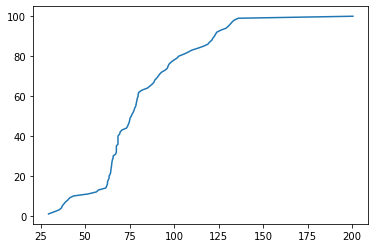

In [261]:
# data visualization - line chart
y = groupeddf["measure_value"].agg("max").to_frame().rename(columns={'measure_value': 'ceiling_value'}).reset_index()["Ntile"]
x = groupeddf["measure_value"].agg("max").to_frame().rename(columns=
                                                            {'measure_value': 'ceiling_value'}).reset_index()["ceiling_value"]

plt.plot(x,y)


<function matplotlib.pyplot.show(close=None, block=None)>

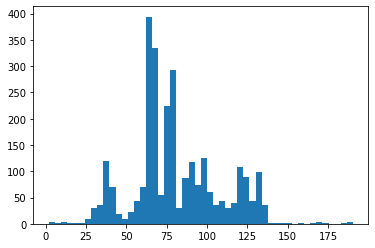

In [262]:
# create a frequency histogram
newweightdf = healthdf[healthdf["measure"] == "weight"].copy()
mask1 = newweightdf["measure_value"] > 0
mask2 = newweightdf["measure_value"] <= 200
newweightdf = newweightdf[mask1 & mask2]
x = newweightdf["measure_value"]
plt.hist(x, bins = 50)
plt.show